In [45]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score



In [46]:
# Load datasets
customers = pd.read_csv(r"C:\Users\pc\Desktop\zeotap\ecommerce_analysis\data\Customers.csv")
products = pd.read_csv(r"C:\Users\pc\Desktop\zeotap\ecommerce_analysis\data\Products.csv")
transactions = pd.read_csv(r"C:\Users\pc\Desktop\zeotap\ecommerce_analysis\data\Transactions.csv")

# Preview datasets
print("Customers Dataset:")
print(customers.head())
print("\nProducts Dataset:")
print(products.head())
print("\nTransactions Dataset:")
print(transactions.head())

# Merge datasets on CustomerID and ProductID to ensure necessary information is combined
data = transactions.merge(customers, on='CustomerID')
data = data.merge(products[['ProductID', 'Category']], on='ProductID', how='left')

# Check columns after merge to ensure 'Category' is included
print("\nMerged Data Columns:")
print(data.columns)


Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166   

In [47]:
# Preprocess and prepare data for clustering
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])

# Aggregate data to create features for each customer
customer_features = data.groupby('CustomerID').agg({
    'TotalValue': ['sum', 'mean', 'count'],
    'Category': lambda x: list(x),
    'Region': 'first'
}).reset_index()

# Rename columns for clarity
customer_features.columns = ['CustomerID', 'Total_Spent', 'Avg_Spent', 'Total_Transactions', 'Purchased_Categories', 'Region']

# Standardize the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features[['Total_Spent', 'Avg_Spent', 'Total_Transactions']])

# Prepare the data for clustering
cluster_data = pd.DataFrame(scaled_features, columns=['Total_Spent', 'Avg_Spent', 'Total_Transactions'])
print("\nScaled Customer Data for Clustering:")
print(cluster_data.head())



Scaled Customer Data for Clustering:
   Total_Spent  Avg_Spent  Total_Transactions
0    -0.061701  -0.070263           -0.011458
1    -0.877744  -0.934933           -0.467494
2    -0.405857  -0.026271           -0.467494
3     1.032547  -0.076769            1.356650
4    -0.783929  -0.040028           -0.923530


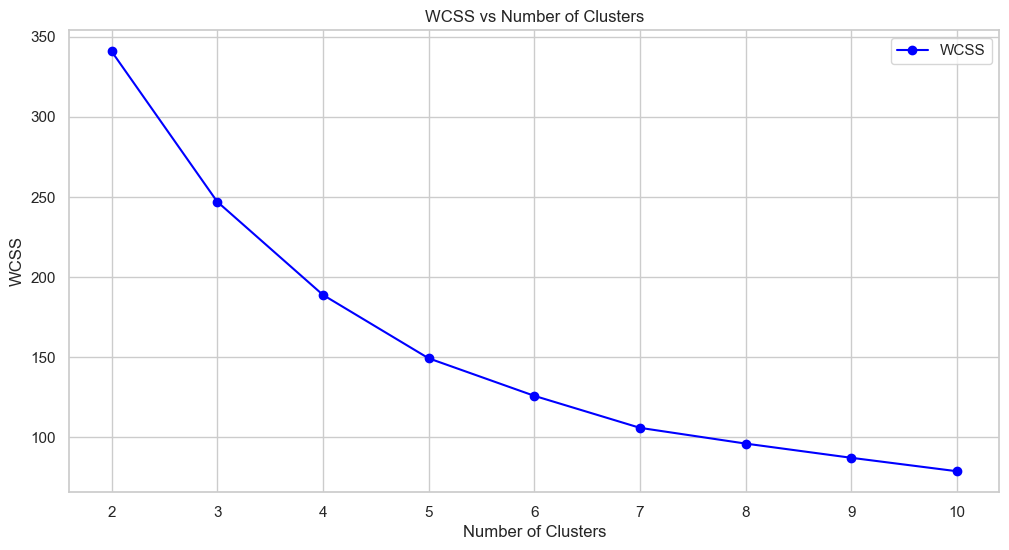

For k=2, Silhouette Score: 0.38021136861826593
For k=3, Silhouette Score: 0.3602726278385162
For k=4, Silhouette Score: 0.3454749066816505
For k=5, Silhouette Score: 0.35876605934971456
For k=6, Silhouette Score: 0.369675314271767
For k=7, Silhouette Score: 0.3612867580911339
For k=8, Silhouette Score: 0.34268530832639743
For k=9, Silhouette Score: 0.3428790528209857
For k=10, Silhouette Score: 0.3551980191488424

Clustering Metrics:
Metrics for k=2:
  - WCSS: 340.969034317116
  - Number of clusters: 2
----------------------------------------
Metrics for k=3:
  - WCSS: 247.12011250964215
  - Number of clusters: 3
----------------------------------------
Metrics for k=4:
  - WCSS: 188.98918561354805
  - Number of clusters: 4
----------------------------------------
Metrics for k=5:
  - WCSS: 149.413404165328
  - Number of clusters: 5
----------------------------------------
Metrics for k=6:
  - WCSS: 125.99783961731737
  - Number of clusters: 6
----------------------------------------
M

In [48]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Elbow Method (WCSS) to determine optimal k
wcss = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(cluster_data)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(cluster_data, kmeans.labels_))

# Plot WCSS to identify the 'elbow' point
plt.figure(figsize=(12,6))
plt.plot(range(2, 11), wcss, marker='o', color='blue', label="WCSS")
plt.title('WCSS vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.legend()
plt.show()

# Display Silhouette scores for each k
for k in range(2, 11):
    print(f'For k={k}, Silhouette Score: {silhouette_scores[k-2]}')

# Print relevant clustering metrics for each k value
print("\nClustering Metrics:")
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(cluster_data)
    # Calculate additional metrics
    silhouette_avg = silhouette_score(cluster_data, kmeans.labels_)
    wcss_value = kmeans.inertia_
    
    print(f"Metrics for k={k}:")
    print(f"  - WCSS: {wcss_value}")
    print(f"  - Number of clusters: {k}")
    print('-' * 40)


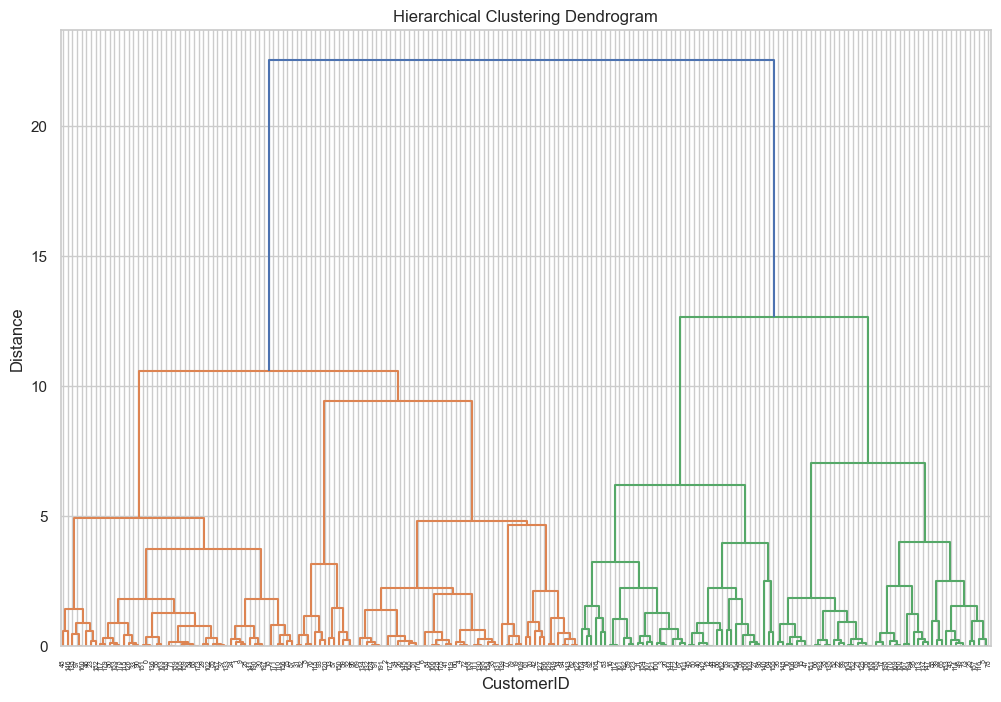

In [49]:
# Step 2: Use Hierarchical Clustering and Dendrogram to visualize possible 'k'
linked = linkage(cluster_data, 'ward')

# Plot the dendrogram to visualize the clusters
plt.figure(figsize=(12, 8))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('CustomerID')
plt.ylabel('Distance')
plt.show()


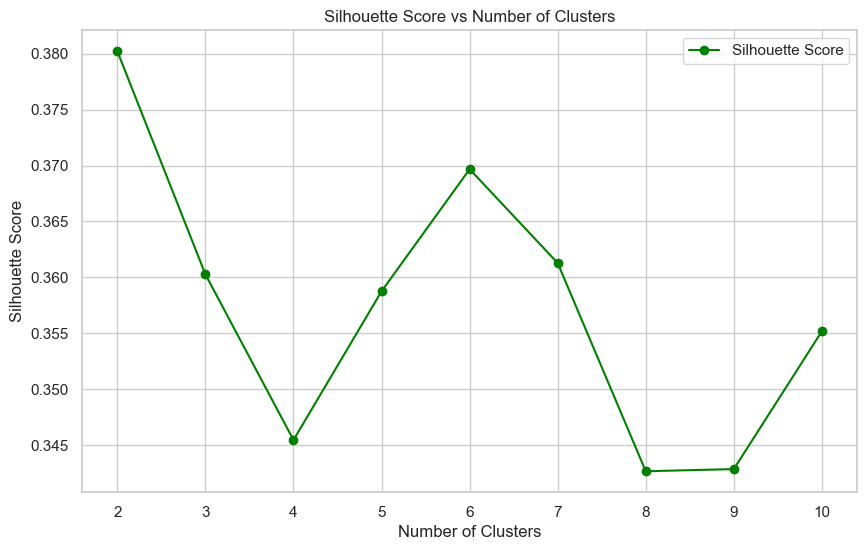


Silhouette Scores for KMeans:
Metrics for k=2:
  - Silhouette Score: 0.38021136861826593
----------------------------------------
Metrics for k=3:
  - Silhouette Score: 0.3602726278385162
----------------------------------------
Metrics for k=4:
  - Silhouette Score: 0.3454749066816505
----------------------------------------
Metrics for k=5:
  - Silhouette Score: 0.35876605934971456
----------------------------------------
Metrics for k=6:
  - Silhouette Score: 0.369675314271767
----------------------------------------
Metrics for k=7:
  - Silhouette Score: 0.3612867580911339
----------------------------------------
Metrics for k=8:
  - Silhouette Score: 0.34268530832639743
----------------------------------------
Metrics for k=9:
  - Silhouette Score: 0.3428790528209857
----------------------------------------
Metrics for k=10:
  - Silhouette Score: 0.3551980191488424
----------------------------------------


In [50]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step: Calculate Silhouette Scores for different values of k (for KMeans)
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(cluster_data)
    
    # Calculate silhouette score and append to the list
    silhouette_avg = silhouette_score(cluster_data, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Scores
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green', label="Silhouette Score")
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

# Print metrics for each k
print("\nSilhouette Scores for KMeans:")
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(cluster_data)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(cluster_data, kmeans.labels_)
    
    print(f"Metrics for k={k}:")
    print(f"  - Silhouette Score: {silhouette_avg}")
    print('-' * 40)


Number of clusters formed: 6


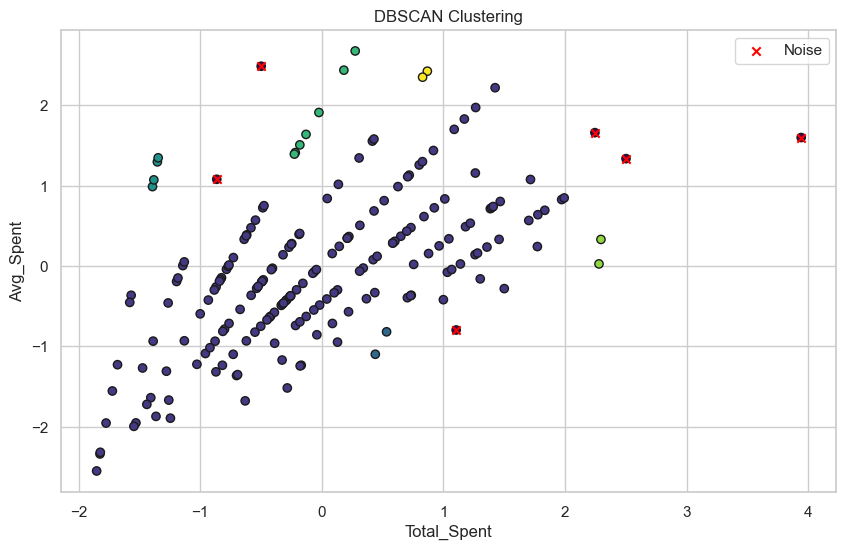


DBSCAN Clustering Metrics:
  - Davies-Bouldin Index (DBI): 1.2752089020398174
  - Number of clusters formed (excluding noise): 6


In [53]:
# Import necessary libraries
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

# Step 4: Use DBSCAN for clustering and calculate the Davies-Bouldin Index (DBI)
dbscan = DBSCAN(eps=0.6, min_samples=2)
dbscan_labels = dbscan.fit_predict(cluster_data)


# Identify the number of clusters formed, excluding noise points (-1)
num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)  # excluding noise points (-1)
print(f'Number of clusters formed: {num_clusters}')

# Visualize DBSCAN results
plt.figure(figsize=(10,6))

# Plot points with different colors for each cluster
plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], c=dbscan_labels, cmap='viridis', marker='o', edgecolor='k')
plt.title('DBSCAN Clustering')
plt.xlabel('Total_Spent')
plt.ylabel('Avg_Spent')

# Mark the noise points with a distinct color (e.g., red)
plt.scatter(cluster_data.iloc[dbscan_labels == -1, 0], cluster_data.iloc[dbscan_labels == -1, 1], c='red', label='Noise', marker='x')

plt.legend()
plt.show()

# Print metrics for DBSCAN
print("\nDBSCAN Clustering Metrics:")
print(f"  - Davies-Bouldin Index (DBI): {dbi_score}")
print(f"  - Number of clusters formed (excluding noise): {num_clusters}")


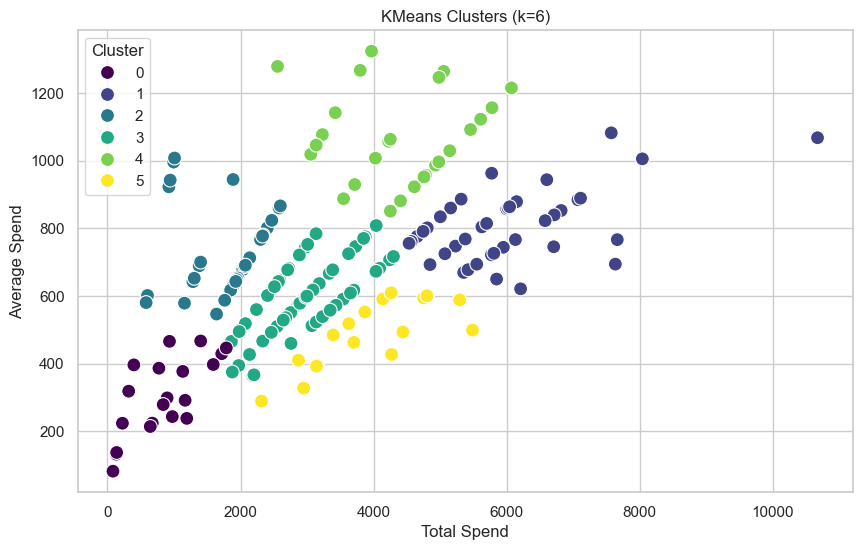


Cluster Centers:
[[-1.43161259 -1.62216042 -1.08314266]
 [ 1.39097874  0.49973669  1.12307026]
 [-0.95305239  0.19546584 -1.19715165]
 [-0.27568028 -0.35005232 -0.04041285]
 [ 0.47049164  1.59462849 -0.41682348]
 [ 0.26990438 -0.82842467  1.40732031]]

Number of Points in Each Cluster:
Cluster
3    63
1    41
2    30
4    27
0    20
5    18
Name: count, dtype: int64


In [52]:
# Step 5: Final clustering using KMeans with the chosen 'k' (based on silhouette score or elbow method)
best_k = 6  #taking best k in terms of silhoutte score and wcss value
kmeans = KMeans(n_clusters=best_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(cluster_data)

# Add KMeans labels to the customer data
customer_features['Cluster'] = kmeans_labels

# Visualize clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=customer_features, x='Total_Spent', y='Avg_Spent', hue='Cluster', palette='viridis', s=100)
plt.title(f'KMeans Clusters (k={best_k})')
plt.xlabel('Total Spend')
plt.ylabel('Average Spend')
plt.show()

# Print cluster centers and number of points in each cluster
print("\nCluster Centers:")
print(kmeans.cluster_centers_)

print("\nNumber of Points in Each Cluster:")
print(customer_features['Cluster'].value_counts())
